# Exercise: Hypothetical Analysis of U.S. Medical Insurance Costs

## Scope of the Project

This project aims at analyzing a [Kaggle dataset](https://www.kaggle.com/mirichoi0218/insurance) containing information regarding the costs of insurance for various people in various parts of the United States. **Please note that the dataset has no references, and may not be based on actual data. This is merely an exercise.** In what follows, I aim at:

1. analyzing the available data, providing basic information concerning percentages and distribution;
2. answering questions about how insurance costs may vary depending on sex assigned at birth and geographical location, and for what reason.

## Preliminary Analysis

In what follows, I will import the dataset and turn it into a pandas DataFrame. I will then analyze the numerical and categorical values of the entire dataset, printing information concerning their averages and their distribution.

### Turning the dataset into a pandas DataFrame

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_csv("insurance.csv")
print(df.head())
df.head()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Numerical values in the dataset

I will start by creating different arrays for the numerical values in the dataset:

1. **age**;
2. **BMI** ([Body Mass Index](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm))
3. number of **children**;
4. insurance **costs**.

In [2]:
age = df["age"]
bmi = df["bmi"]
children = df["children"]
charges = df["charges"]

To orient my research and to gain some understanding of the shape of the dataset, I will create a function that returns some basic statistical information concerning each array; this is `essential_array_analysis`. I will then print out this information for each numerical array in the dataset, followed by a histogram representing its distribution.

In [3]:
def essential_array_analysis(array):
    return (
        """
        The mean of this array is {mean}.
        This is the five-number summary for this array:
            - sample minimum: {sample_minimum},
            - first quartile: {first_quartile},
            - median: {median},
            - third quartile: {third_quartile},
            - sample maximum: {sample_maximum}.
        The interquartile range for this array is {interquartile_range}.
        The standard deviation is {standard_deviation}.
        The variance is {variance}.
        """.format(
        mean = round(np.mean(array), 2),
        sample_minimum = round(min(array), 2),
        first_quartile = round(np.percentile(array, 25), 2),
        median = round(np.median(array), 2),
        third_quartile = round(np.percentile(array, 75), 2),
        sample_maximum = round(max(array), 2),
        interquartile_range = round((np.percentile(array, 75) - np.percentile(array, 25)), 2),
        standard_deviation = round(np.std(array), 2),
        variance = round(np.var(array), 2)
        ))

#### Medical Costs


 **Individual medical costs billed by health insurance**
 
        The mean of this array is 13270.42.
        This is the five-number summary for this array:
            - sample minimum: 1121.87,
            - first quartile: 4740.29,
            - median: 9382.03,
            - third quartile: 16639.91,
            - sample maximum: 63770.43.
        The interquartile range for this array is 11899.63.
        The standard deviation is 12105.48.
        The variance is 146542766.49.
        


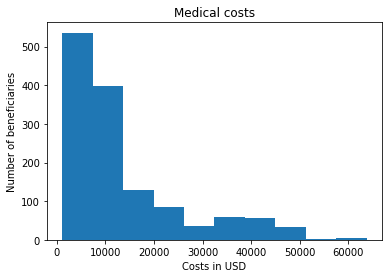

In [4]:
print("\n **Individual medical costs billed by health insurance**\n", essential_array_analysis(charges))
plt.hist(charges)
plt.title("Medical costs")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.show()

#### Age


 **Age of primary beneficiary** 
 
        The mean of this array is 39.21.
        This is the five-number summary for this array:
            - sample minimum: 18,
            - first quartile: 27.0,
            - median: 39.0,
            - third quartile: 51.0,
            - sample maximum: 64.
        The interquartile range for this array is 24.0.
        The standard deviation is 14.04.
        The variance is 197.25.
        


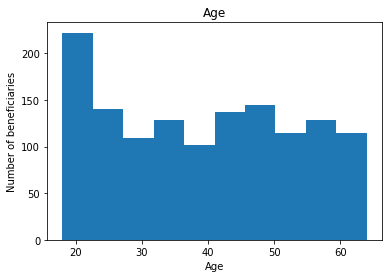

In [5]:
print("\n **Age of primary beneficiary** \n", essential_array_analysis(age))
plt.hist(age)
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Number of beneficiaries")
plt.show()

#### Body Mass Index


 **Body mass index** 
 
        The mean of this array is 30.66.
        This is the five-number summary for this array:
            - sample minimum: 15.96,
            - first quartile: 26.3,
            - median: 30.4,
            - third quartile: 34.69,
            - sample maximum: 53.13.
        The interquartile range for this array is 8.4.
        The standard deviation is 6.1.
        The variance is 37.16.
        


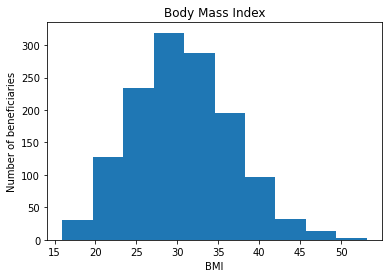

In [6]:
print("\n **Body mass index** \n", essential_array_analysis(bmi))
plt.hist(bmi)
plt.title("Body Mass Index")
plt.xlabel("BMI")
plt.ylabel("Number of beneficiaries")
plt.show()

#### Number of Children


 **Number of children** 
 
        The mean of this array is 1.09.
        This is the five-number summary for this array:
            - sample minimum: 0,
            - first quartile: 0.0,
            - median: 1.0,
            - third quartile: 2.0,
            - sample maximum: 5.
        The interquartile range for this array is 2.0.
        The standard deviation is 1.21.
        The variance is 1.45.
        


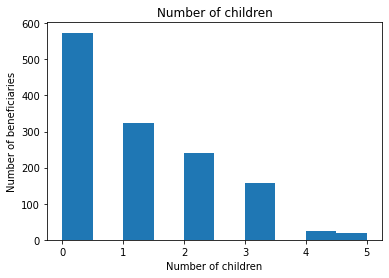

In [7]:
print("\n **Number of children** \n", essential_array_analysis(children))
plt.hist(children)
plt.title("Number of children")
plt.xlabel("Number of children")
plt.ylabel("Number of beneficiaries")
plt.show()

### Categorical values in the dataset

The dataset features three categorical series:
1. **smokers** and non smokers;
2. geographical **region** of the beneficiary;
3. **sex** (I assume that this is the sex assigned at birth, as it appears on the beneficiaries' birth certificate).
    
I will show the distribution of these values by:
- grouping the entries for each category;
- adding a column for percentages;
- creating a pie chart for each one of them.

The function `category` returns a grouped and pivoted DataFrame that shows the number of beneficiaries belonging to each relevant category. I will use this function to help me organize and represent the data for each category.

In [8]:
category = lambda category: \
    df.rename(columns = {"charges": "beneficiaries"}).groupby(category).beneficiaries.count().reset_index()

#### Geographical regions

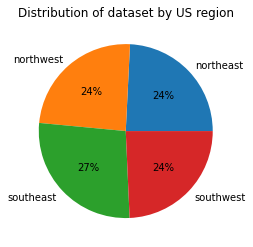

      region  beneficiaries  percentage
0  northeast            324   24.215247
1  northwest            325   24.289985
2  southeast            364   27.204783
3  southwest            325   24.289985


In [9]:
region = category("region")
plt.pie(region["beneficiaries"], labels = region["region"], autopct = "%d%%")
plt.title("Distribution of dataset by US region")
plt.show()
perc_column = lambda perc_column: (perc_column["beneficiaries"] / df["charges"].count()) * 100
region["percentage"] = perc_column(region)
print(region)

#### Smoker status

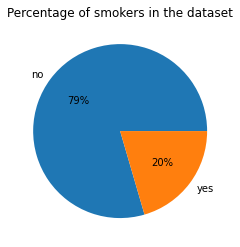

  smoker  beneficiaries  percentage
0     no           1064   79.521674
1    yes            274   20.478326


In [10]:
smoker = category("smoker")
plt.pie(smoker["beneficiaries"], labels = smoker["smoker"], autopct = "%d%%")
plt.title("Percentage of smokers in the dataset")
plt.show()
smoker["percentage"] = perc_column(smoker)
print(smoker)

#### Sex assigned at birth

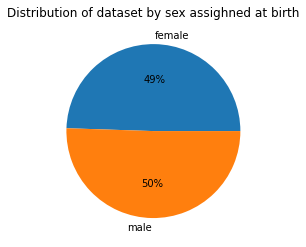

      sex  beneficiaries  percentage
0  female            662   49.476831
1    male            676   50.523169


In [11]:
sex = category("sex")
plt.pie(sex["beneficiaries"], labels = sex["sex"], autopct = "%d%%")
plt.title("Distribution of dataset by sex assighned at birth")
plt.show()
sex["percentage"] = perc_column(sex)
print(sex)

### Adding two more columns for categorical values

To facilitate the following steps of my analysis, I will add two more columns featuring categorical values that correspond to the numerical values in the dataset:
1. a column for cost tiers (based on the "charges");
2. a column for BMI categories (based on the BMI values).

#### Adding a column for insurance costs tiers
As my preliminary analysis has shown (see "Medical Costs" above), the insurance costs in this dataset tend to be under \\$15,000. To facilitate the next steps of the analysis, I will add another column where the insurance costs are categorized into two tiers with respect to the average cost of \\$13270.42:
- above average;
- below average.

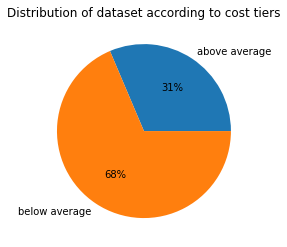

In [12]:
df["cost tier"] = df.apply(lambda row: "above average" if row["charges"] > 13270.42 else "below average", axis = 1)

tier = category("cost tier")
plt.pie(tier["beneficiaries"], labels = tier["cost tier"], autopct = "%d%%")
plt.title("Distribution of dataset according to cost tiers")
plt.show()

#### Adding a column for categorical BMI scores
To simplify later stages of the analysis, I will add a column that specifies whether a person's weight is considered underweight, normal, or overweight, following the guidelines specified by the [National Institute of Health](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm):
- underweight = < 18.5;
- normal weight = 18.5–24.9;
- overweight = above 25.

  bmi category  beneficiaries
0       normal            225
1        obese            707
2   overweight            386
3  underweight             20


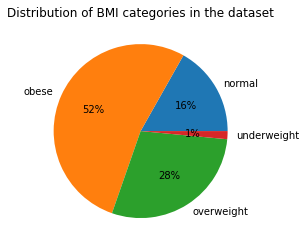

,age,sex,bmi,children,smoker,region,charges,cost tier,bmi category
0,19,female,27.900,0,yes,southwest,16884.92400,above average,overweight
1,18,male,33.770,1,no,southeast,1725.55230,below average,obese
2,28,male,33.000,3,no,southeast,4449.46200,below average,obese
3,33,male,22.705,0,no,northwest,21984.47061,above average,normal
4,32,male,28.880,0,no,northwest,3866.85520,below average,overweight


In [13]:
df["bmi category"] = df.apply(
    lambda row: "underweight" if row.bmi < 18.5 else (
        "normal" if row.bmi >= 18.5 and row.bmi < 25 else (
        "overweight" if row.bmi >= 25 and row.bmi < 30 else "obese")), axis = 1)
bmi_categories = category("bmi category")
print(bmi_categories)
plt.pie(bmi_categories["beneficiaries"], labels = bmi_categories["bmi category"], autopct = "%d%%")
plt.title("Distribution of BMI categories in the dataset")
plt.show()
df.head()

## Analyzing the relationship between insurance costs and sex assigned at birth

In this step of my analysis, I will examine the distribution of insurance costs for beneficiaries who are categorized as "men" and "women" in the dataset. I will try to establish: 
- which of the two categories pays higher insurance costs;
- whether this difference is statistically significant;
- what may be the reasons for this difference.

### Differences in insurance costs

I will start by creating two distinct arrays containing insurance costs paid by beneficiaries categorized as "female" and as "male" in this dataset. I will then print out a histogram that shows the difference between the two.


**Costs for female beneficiaries**
 
        The mean of this array is 12569.58.
        This is the five-number summary for this array:
            - sample minimum: 1607.51,
            - first quartile: 4885.16,
            - median: 9412.96,
            - third quartile: 14454.69,
            - sample maximum: 63770.43.
        The interquartile range for this array is 9569.53.
        The standard deviation is 11120.3.
        The variance is 123660966.64.
        

**Costs for male beneficiaries**
 
        The mean of this array is 13956.75.
        This is the five-number summary for this array:
            - sample minimum: 1121.87,
            - first quartile: 4619.13,
            - median: 9369.62,
            - third quartile: 18989.59,
            - sample maximum: 62592.87.
        The interquartile range for this array is 14370.46.
        The standard deviation is 12961.43.
        The variance is 167998626.43.
        


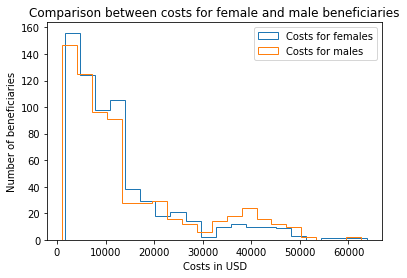

In [14]:
female_costs = df[df.sex == "female"]["charges"]
print("\n**Costs for female beneficiaries**\n", essential_array_analysis(female_costs))
male_costs = df[df.sex == "male"]["charges"]
print("\n**Costs for male beneficiaries**\n", essential_array_analysis(male_costs))
plt.hist(female_costs, bins=20, histtype="step")
plt.hist(male_costs, bins=20, histtype="step")
plt.title("Comparison between costs for female and male beneficiaries")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.legend(["Costs for females", "Costs for males"])
plt.show()

#### Results

The two groups have slightly different means:
- **12569.58** for beneficiaries categorized as women, 
- **13956.75** for beneficiaries categorized as men.

In short, the beneficiaries that are categorized as "male" in the dataset seem to be spending more in insurance costs.

#### Assessing statistical significance with Two-Sample T-Test

Can we say that this difference is statistically significant? I will perform a **Two-Sample T-Test** to verify this hypothesis.

The function `perform_2sample_ttest()` returns the P-value for the test in the form of a percentage and states whether the difference between the two arrays should be deemed significant or not. 

In [15]:
def perform_2sample_ttest(group1, group2):
    pval = ttest_ind(group1, group2)[1]
    print("There is a {:.2%} probability that the two groups belong to a population with the same average.".format(pval))
    print("The difference is {maybe}statistically significant.".format(maybe = "" if pval < 0.05 else "not "))
    return pval

pval_sex_costs = perform_2sample_ttest(male_costs, female_costs)

There is a 3.61% probability that the two groups belong to a population with the same average.
The difference is statistically significant.


So, men tend to pay higher insurance costs than women in this dataset. What might be the reason for this difference? Do the men in this dataset tend to smoke more than women? To have higher BMIs? To be older? To have more children? 

### Explaining the difference in costs: Age

Let's start with the age difference. Of course, if we were to find a statistically significant difference in the age distribution for these two groups, we would have to conclude that the disparity in costs is caused by this oversight in the preparation of the dataset.

Therefore, I will create two arrays for the ages recorded in the dataset for "women" and "men"; I will perform a **Two-Sample T-Test** to assess statistical significance for the difference between the two; and I will plot a histogram to show it.


**Age distribution for women in the dataset**
 
        The mean of this array is 39.5.
        This is the five-number summary for this array:
            - sample minimum: 18,
            - first quartile: 27.0,
            - median: 40.0,
            - third quartile: 51.75,
            - sample maximum: 64.
        The interquartile range for this array is 24.75.
        The standard deviation is 14.04.
        The variance is 197.22.
        

**Age distribution for men in the dataset**
 
        The mean of this array is 38.92.
        This is the five-number summary for this array:
            - sample minimum: 18,
            - first quartile: 26.0,
            - median: 39.0,
            - third quartile: 51.0,
            - sample maximum: 64.
        The interquartile range for this array is 25.0.
        The standard deviation is 14.04.
        The variance is 197.11.
        
There is a 44.59% probability that the two groups belong to a population with the same average.
T

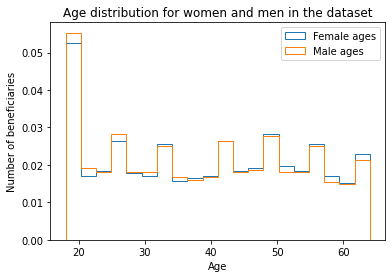

In [16]:
female_age = df[df.sex == "female"]["age"]
print("\n**Age distribution for women in the dataset**\n", essential_array_analysis(female_age))
male_age = df[df.sex == "male"]["age"]
print("\n**Age distribution for men in the dataset**\n", essential_array_analysis(male_age))
pval_sex_age = perform_2sample_ttest(male_age, female_age)
plt.hist(female_age, bins=20, histtype="step", density=True)
plt.hist(male_age, bins=20, histtype="step", density=True)
plt.title("Age distribution for women and men in the dataset")
plt.legend(["Female ages", "Male ages"])
plt.xlabel("Age")
plt.ylabel("Number of beneficiaries")
plt.show()

#### Results

The ages for the two groups are roughly the same; the differences between the two datasets from this standpoint do not appear to be statistically significant.

### Explaining the difference in costs: BMI

I will now determine whether the difference in costs for beneficiaries categorized as "women" and "men" might depend on their respective BMI values. I will follow the same method outlined above: creating two arrays, performing a **Two-Sample T-Test**, plotting the difference on a histogram.


**Distribution of BMI values for women in the dataset**
 
        The mean of this array is 30.38.
        This is the five-number summary for this array:
            - sample minimum: 16.82,
            - first quartile: 26.12,
            - median: 30.11,
            - third quartile: 34.31,
            - sample maximum: 48.07.
        The interquartile range for this array is 8.19.
        The standard deviation is 6.04.
        The variance is 36.5.
        

**Distribution of BMI values for men in the dataset**
 
        The mean of this array is 30.94.
        This is the five-number summary for this array:
            - sample minimum: 15.96,
            - first quartile: 26.41,
            - median: 30.69,
            - third quartile: 34.99,
            - sample maximum: 53.13.
        The interquartile range for this array is 8.58.
        The standard deviation is 6.14.
        The variance is 37.65.
        
There is a 9.00% probability that the two groups belong to a popu

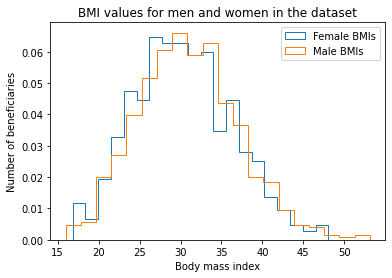

In [17]:
female_bmi = df[df.sex == "female"]["bmi"]
print("\n**Distribution of BMI values for women in the dataset**\n", essential_array_analysis(female_bmi))
male_bmi = df[df.sex == "male"]["bmi"]
print("\n**Distribution of BMI values for men in the dataset**\n", essential_array_analysis(male_bmi))
pval_sex_bmi = perform_2sample_ttest(male_bmi, female_bmi)
plt.hist(female_bmi, bins=20, histtype="step", density=True)
plt.hist(male_bmi, bins=20, histtype="step", density=True)
plt.title("BMI values for men and women in the dataset")
plt.legend(["Female BMIs", "Male BMIs"])
plt.xlabel("Body mass index")
plt.ylabel("Number of beneficiaries")
plt.show()

#### Results

The difference in the BMI values for the two groups is little (0.56 in the average) and does not seem to be statistically significant.

### Explaining the difference in costs: Smokers and Non Smokers

Finally, I will compare the percentages of smokers and non smokers in the two groups. Since this is a categorical value, I will need to use a slightly different method:
- I will count the number of smokers and non smokers for each sex category;
- I will add a column stating the percentage of smokers for each sex category;
- I  then I will represent the different percentages in two side-by-side pie charts.

smoker     sex   no  yes  percentage
0       female  547  115   17.371601
1         male  517  159   23.520710


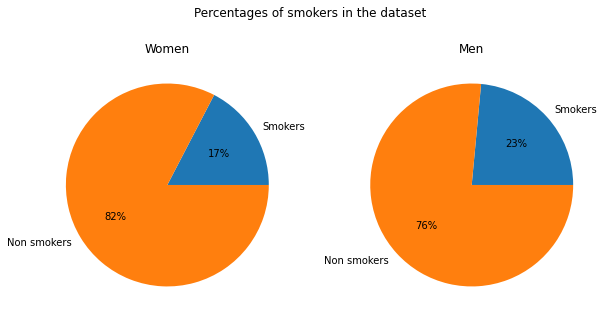

In [18]:
sex_smokers = df.groupby(["sex", "smoker"]).charges.count().reset_index()
sex_smokers = sex_smokers.pivot(index = "sex", columns = "smoker", values = "charges").reset_index()
sex_smokers["percentage"] = (sex_smokers["yes"] / (sex_smokers["no"] + sex_smokers["yes"])) * 100
print(sex_smokers)
fig_smokers = plt.figure(figsize=(10,10))
plt.suptitle("Percentages of smokers in the dataset", y=0.75)
pie_1 = plt.subplot(1, 2, 1)
pie_2 = plt.subplot(1, 2, 2)
pie_1.pie(sex_smokers.loc[sex_smokers["sex"] == "female", ["yes", "no"]].values.tolist()[0],
       labels = ["Smokers", "Non smokers"], autopct = "%d%%")
pie_1.title.set_text("Women")
pie_2.pie(sex_smokers.loc[sex_smokers["sex"] == "male", ["yes", "no"]].values.tolist()[0],
        labels = ["Smokers", "Non smokers"], autopct = "%d%%")
pie_2.title.set_text("Men")
plt.show()

There seems to be a **substantial difference** in the percentages of smokers and non smokers between beneficiaries categorized as men and those categorized as women: 17% vs. 23%. If statistically significant, this difference would probably explain the difference in the insurance costs for the two groups.

#### Chi-square Test of Independence

To establish the statistical significance of this difference, I will perform a **Chi-square test** on these values. I will first create a contingency table containing the numbers of smokers and non smokers for each sex category; then I will perform the test, print out the P-value in the form of a percentage, and state whether the difference should be deemed statistically significant. 

In [19]:
smoker_sex_contingency = [
    sex_smokers.loc[sex_smokers["sex"] == "male", ["yes", "no"]].values.tolist()[0],
    sex_smokers.loc[sex_smokers["sex"] == "female", ["yes", "no"]].values.tolist()[0]
]

def perform_chi2_test(contingency_table):
    pval = chi2_contingency(contingency_table)[1]
    print("There is a {:.2%} probability that these groups belong to a population with the same distribution.".format(pval))
    print("The difference is {maybe}statistically significant.".format(maybe = "" if pval < 0.05 else "not "))
    return pval

smoker_sex_pval = perform_chi2_test(smoker_sex_contingency)

There is a 0.65% probability that these groups belong to a population with the same distribution.
The difference is statistically significant.


### Explaining the difference in costs: Conclusion

Our analysis has shown that the beneficiaries who have been categorized as men in this dataset spend more in insurance than those categorized as women. It has also established one of the likely causes of this difference: in the dataset, the beneficiaries categorized as men are far more likely to be smokers.

## Analyzing the relatioship between insurance costs and geographical regions

In this section of my analysis, I will determine whether beneficiaries located in different regions of the country incur in higher or lower insurance costs, and whether this difference is statistically significant. I will then attempt to determine some of the causes that might justify this difference. I will start by printing out the names of the regions in the dataset.

In [20]:
print("The regions in the dataset are:", df.region.unique().tolist())

The regions in the dataset are: ['southwest', 'southeast', 'northwest', 'northeast']


### Differences in insurance costs

To start my analysis, I will create four arrays containing the insurance costs paid by beneficiaries in each region.

In [21]:
costs_southwest = df[df.region == "southwest"]["charges"]
costs_southeast = df[df.region == "southeast"]["charges"]
costs_northwest = df[df.region == "northwest"]["charges"]
costs_northeast = df[df.region == "northeast"]["charges"]
print("\n**Insurance costs in the Southwest region**\n", essential_array_analysis(costs_southwest))
print("\n **Insurance costs in the Southeast region** \n", essential_array_analysis(costs_southeast))
print("\n **Insurance costs in the Northwest region** \n", essential_array_analysis(costs_northwest))
print("\n **Insurance costs in the Northeast region** \n", essential_array_analysis(costs_northeast))


**Insurance costs in the Southwest region**
 
        The mean of this array is 12346.94.
        This is the five-number summary for this array:
            - sample minimum: 1241.57,
            - first quartile: 4751.07,
            - median: 8798.59,
            - third quartile: 13462.52,
            - sample maximum: 52590.83.
        The interquartile range for this array is 8711.45.
        The standard deviation is 11539.39.
        The variance is 133157409.11.
        

 **Insurance costs in the Southeast region** 
 
        The mean of this array is 14735.41.
        This is the five-number summary for this array:
            - sample minimum: 1121.87,
            - first quartile: 4440.89,
            - median: 9294.13,
            - third quartile: 19526.29,
            - sample maximum: 63770.43.
        The interquartile range for this array is 15085.4.
        The standard deviation is 13951.89.
        The variance is 194655355.14.
        

 **Insurance costs in the

There seem to be some significant differences in the costs for each region:
- \\$12346.93 in the SW;
- \\$14735.41 in the SE; 
- \\$12417.57 in the NW; 
- \\$13406.38 in the NE.

I will try to represent these differences by plotting four histograms and by placing them alongside each other.

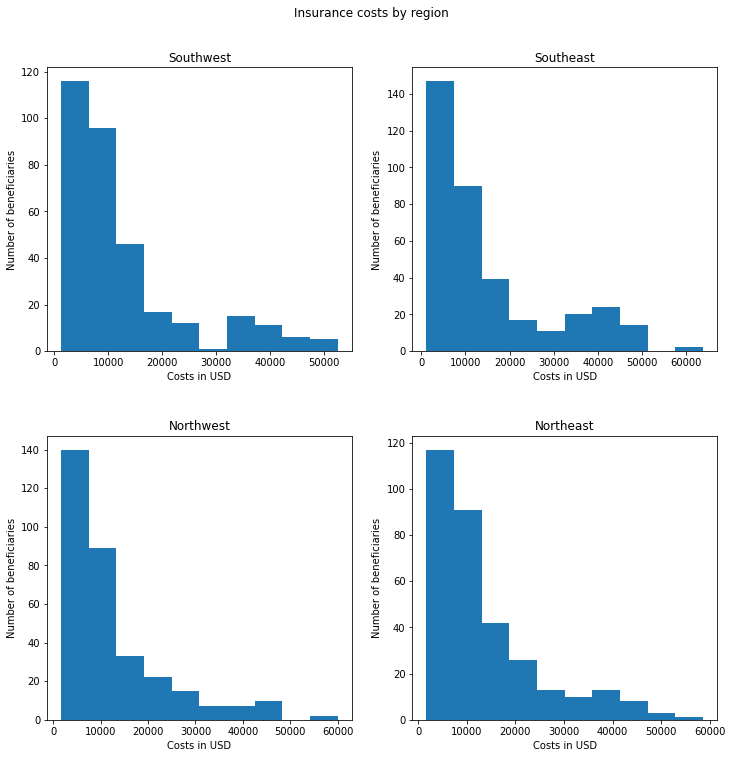

In [22]:
fig_costs_region = plt.figure(figsize=(12,12))
fig_costs_region.suptitle("Insurance costs by region", y=0.95)
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
plt.hist(costs_southwest)
plt.title("Southwest")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.subplot(2,2,2)
plt.hist(costs_southeast)
plt.title("Southeast")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.subplot(2,2,3)
plt.hist(costs_northwest)
plt.title("Northwest")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.subplot(2,2,4)
plt.hist(costs_northeast)
plt.title("Northeast")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.show()

The histograms help us perceive a difference in the distributions of these values (for instance, the higher concentration of 30k-50k costs in the Southeast and Northeast regions), but they are not very easy to read. To better represent the differences in costs for each one of these regions, I will use the "cost tier" column that I have prepared in the first phase of my analysis. For each region in the dataset, I will count the beneficiaries that pay either "above average" or "below average" costs, and then plot a pie chart representing the percentages.

cost tier     region  above average  below average
0          northeast            109            215
1          northwest             96            229
2          southeast            130            234
3          southwest             85            240


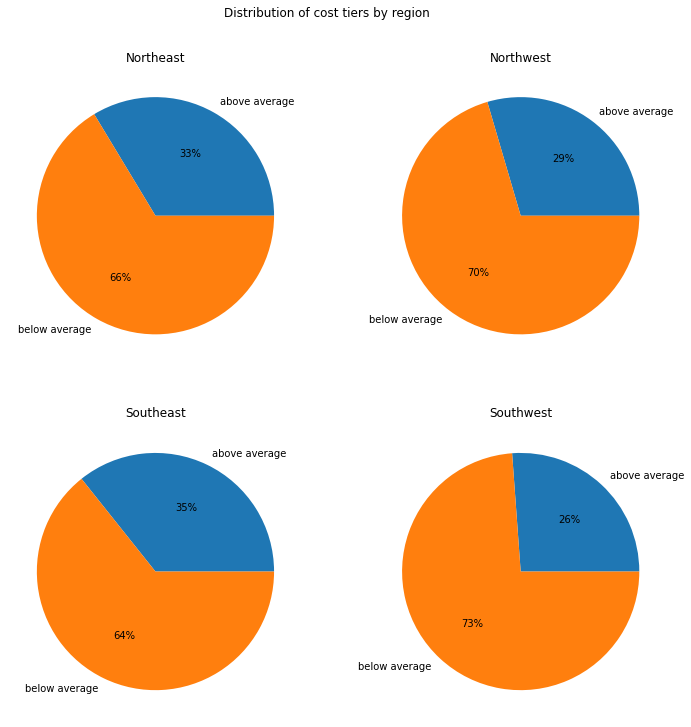

In [23]:
region_cost_tier = df.groupby(["region", "cost tier"]).charges.count().reset_index()\
                    .pivot(columns = "cost tier", index = "region", values = "charges").reset_index()
print(region_cost_tier)
tier_names = ["above average", "below average"]
plot_region = lambda plot_region: plt.pie(region_cost_tier.loc[region_cost_tier["region"] == plot_region,\
              tier_names].values.tolist()[0], labels = tier_names, autopct="%d%%")
fig_cost_tiers_regions = plt.figure(figsize=(12,12))
fig_cost_tiers_regions.suptitle("Distribution of cost tiers by region", y=0.95)
plt.subplot(2,2,1)
plot_region("northeast")
plt.title("Northeast")
plt.subplot(2,2,2)
plot_region("northwest")
plt.title("Northwest")
plt.subplot(2,2,3)
plot_region("southeast")
plt.title("Southeast")
plt.subplot(2,2,4)
plot_region("southwest")
plt.title("Southwest")
plt.show()

#### Results

As the pie charts show, the beneficiaries in the Northeast and Southeast regions of the country tend to spend more than those in the Northwest and Southwest regions.

#### Determining statistical significance: ANOVA and Tukey's Range Tests

I will assess whether the difference in costs is statistically significant by performing an **ANOVA Test** followed by a **Tukey's Range Test**.

In [24]:
def perform_anova_test(*args):
    pval = f_oneway(*args)[1]
    print("There is a {:.2%} probability that these groups belong to a population with the same average.".format(pval))
    print("The difference is {maybe}statistically significant.".format(maybe = "" if pval < 0.05 else "not "))
    return pval

perform_anova_test(costs_southwest, costs_southeast, costs_northwest, costs_northeast)

There is a 3.09% probability that these groups belong to a population with the same average.
The difference is statistically significant.


0.0308933560705201

The ANOVA test has determined that there is a statistically significant difference in the insurance costs that beneficiaries pay in these regions. However, we still do not know what pairings in particular would be unlikely to belong to a dataset with the same average. In order to narrow down this statistical difference to one or more pairings, I will perform a Tukey's range test.

In [25]:
groups = np.concatenate([costs_southwest, costs_southeast, costs_northwest, costs_northeast])
labels = ["Southwest Costs"] * len(costs_southwest) + ["Southeast Costs"] * len(costs_southeast) + \
         ["Northwest Costs"] * len(costs_northwest) + ["Northeast Costs"] * len(costs_northeast)
tukey_location_costs = pairwise_tukeyhsd(groups, labels, 0.05)
print(tukey_location_costs)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1          group2      meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------------------
Northeast Costs Northwest Costs  -988.8091 0.7002 -3428.9473  1451.329  False
Northeast Costs Southeast Costs  1329.0269 0.4754 -1044.9543 3703.0081  False
Northeast Costs Southwest Costs -1059.4471 0.6584 -3499.5853  1380.691  False
Northwest Costs Southeast Costs  2317.8361 0.0583    -54.212 4689.8842  False
Northwest Costs Southwest Costs    -70.638    0.9 -2508.8955 2367.6195  False
Southeast Costs Southwest Costs -2388.4741 0.0477 -4760.5221   -16.426   True
-----------------------------------------------------------------------------


#### Results

According to the test, there are no statistically significant differences in any of these pairings, with the exception of the different costs paid in the Southeast and Southwest regions. Please note that the P-value for this pairing is around 0.047, few points below the standard threshold of 0.05.

As a reminder, the average costs for the Southeast amount to \\$12,346.93; those in the Southwest amount to \\$14,735.41. I will plot them in a histogram for clarity.

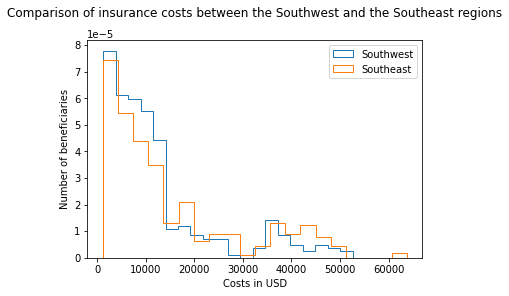

In [26]:
plt.hist(costs_southwest, histtype="step", bins=20, density=True)
plt.hist(costs_southeast, histtype="step", bins=20, density=True)
plt.legend(["Southwest", "Southeast"])
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.title("Comparison of insurance costs between the Southwest and the Southeast regions", y=1.08)
plt.show()

### Explaining the difference in costs: Age

As I have done for the sex categories in this dataset, I will try to offer some possible explanations for the differences in insurance costs that exist between these regions, especially in the case of the Southeast and the Southwest. I will therefore examine the different value distributions for these four regions, starting with age.

As I have done for the "men" and "women" categories, I will prepare four different arrays containing the age values for each region; I will print out some basic statistical information about each array; and I will perform an **ANOVA Test** to determine whether a statistically significant difference exists between them.

In [27]:
age_southwest = df[df["region"] == "southwest"]["age"]
age_northeast = df[df["region"] == "northeast"]["age"]
age_southeast = df[df["region"] == "southeast"]["age"]
age_northwest = df[df["region"] == "northwest"]["age"]

print("\n**Age distribution for the SW region in the dataset**\n", essential_array_analysis(age_southwest))
print("\n**Age distribution for the NE region in the dataset**\n", essential_array_analysis(age_northeast))
print("\n**Age distribution for the SE region in the dataset**\n", essential_array_analysis(age_southeast))
print("\n**Age distribution for the NW region in the dataset**\n", essential_array_analysis(age_northwest))

perform_anova_test(age_southwest, age_southeast, age_northwest, age_northeast)


**Age distribution for the SW region in the dataset**
 
        The mean of this array is 39.46.
        This is the five-number summary for this array:
            - sample minimum: 19,
            - first quartile: 27.0,
            - median: 39.0,
            - third quartile: 51.0,
            - sample maximum: 64.
        The interquartile range for this array is 24.0.
        The standard deviation is 13.94.
        The variance is 194.28.
        

**Age distribution for the NE region in the dataset**
 
        The mean of this array is 39.27.
        This is the five-number summary for this array:
            - sample minimum: 18,
            - first quartile: 27.0,
            - median: 39.5,
            - third quartile: 51.0,
            - sample maximum: 64.
        The interquartile range for this array is 24.0.
        The standard deviation is 14.05.
        The variance is 197.33.
        

**Age distribution for the SE region in the dataset**
 
        The mean of thi

0.970989069987742

#### Results

The age distribution for these four groups seems to be largely the same.

### Explaining the difference in costs: BMI

I will now follow the same method to compare the different BMI (Body Mass Index) values in these four regions: preparing arrays containing the BMIs for each region; printing out some basic statistical information; performing an **ANOVA Test** to detect statistically significant differences.

In [28]:
bmi_southwest = df[df["region"] == "southwest"]["bmi"]
bmi_northeast = df[df["region"] == "northeast"]["bmi"]
bmi_southeast = df[df["region"] == "southeast"]["bmi"]
bmi_northwest = df[df["region"] == "northwest"]["bmi"]

print("\n**BMI values for the SW region in the dataset**\n", essential_array_analysis(bmi_southwest))
print("\n**BMI values for the NE region in the dataset**\n", essential_array_analysis(bmi_northeast))
print("\n**BMI values for the SE region in the dataset**\n", essential_array_analysis(bmi_southeast))
print("\n**BMI values for the NW region in the dataset**\n", essential_array_analysis(bmi_northwest))

anova_bmi_region = perform_anova_test(bmi_southwest, bmi_southeast, bmi_northwest, bmi_northeast)


**BMI values for the SW region in the dataset**
 
        The mean of this array is 30.6.
        This is the five-number summary for this array:
            - sample minimum: 17.4,
            - first quartile: 26.9,
            - median: 30.3,
            - third quartile: 34.6,
            - sample maximum: 47.6.
        The interquartile range for this array is 7.7.
        The standard deviation is 5.68.
        The variance is 32.3.
        

**BMI values for the NE region in the dataset**
 
        The mean of this array is 29.17.
        This is the five-number summary for this array:
            - sample minimum: 15.96,
            - first quartile: 24.87,
            - median: 28.88,
            - third quartile: 32.89,
            - sample maximum: 48.07.
        The interquartile range for this array is 8.03.
        The standard deviation is 5.93.
        The variance is 35.15.
        

**BMI values for the SE region in the dataset**
 
        The mean of this array is 3

According to the ANOVA Test, the differences in the distributions of values in these four datasets is, from a statistical standpoint, exceptionally significant. I will perform a **Tukey's Range Test** to determine which pairings in particular should be deemed different from a statistical standpoint.

In [29]:
groups = np.concatenate([bmi_southwest, bmi_southeast, bmi_northwest, bmi_northeast])
labels = ["BMIs in the Southwest"] * len(bmi_southwest) + ["BMIs in the Southeast"] * len(bmi_southeast) + \
         ["BMIs in the Northwest"] * len(bmi_northwest) + ["BMIs in the Northeast"] * len(bmi_northeast)
tukey_location_costs = pairwise_tukeyhsd(groups, labels, 0.05)
print(tukey_location_costs)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
BMIs in the Northeast BMIs in the Northwest   0.0263    0.9 -1.1552  1.2078  False
BMIs in the Northeast BMIs in the Southeast   4.1825  0.001   3.033   5.332   True
BMIs in the Northeast BMIs in the Southwest   1.4231 0.0107  0.2416  2.6046   True
BMIs in the Northwest BMIs in the Southeast   4.1562  0.001  3.0077  5.3047   True
BMIs in the Northwest BMIs in the Southwest   1.3968 0.0127  0.2162  2.5774   True
BMIs in the Southeast BMIs in the Southwest  -2.7594  0.001 -3.9079 -1.6108   True
----------------------------------------------------------------------------------


#### Results

According to the Tukey's Range Test, all these pairings feature statistically significant differences, with the single exception of the BMI values in the Northeast and in the Northwest.

#### Plotting the different BMI categories for each region

To better represent the difference in the distribution of BMI values for each region, I will use the BMI categories stored in the column that I created during the first phase of my analysis. I will first prepare a table containing the number of beneficiaries for each BMI category in each region; then, I will plot the values for each regions in four pie charts that I will place next to each other.

bmi category     region  normal  obese  overweight  underweight
0             northeast    73.0  143.0        98.0         10.0
1             northwest    63.0  148.0       107.0          7.0
2             southeast    41.0  243.0        80.0          0.0
3             southwest    48.0  173.0       101.0          3.0


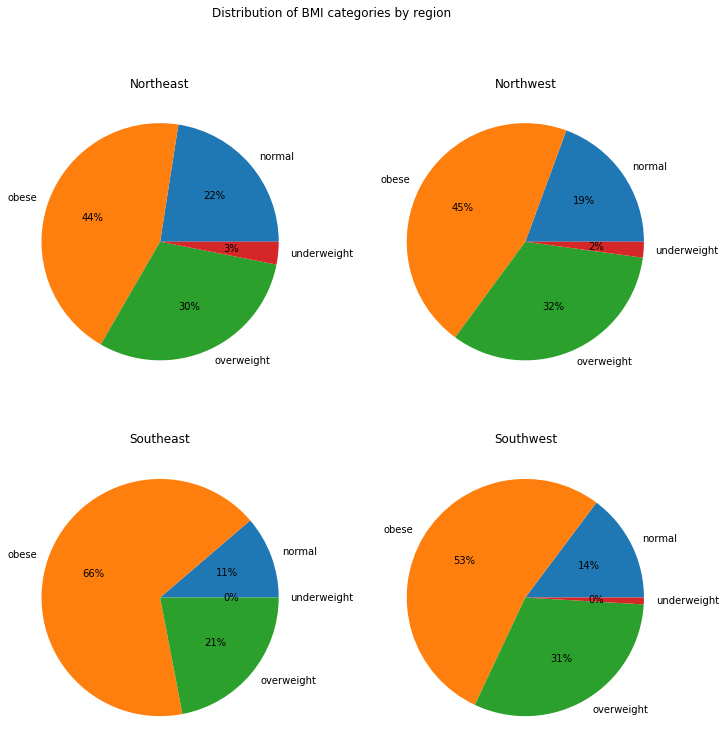

In [30]:
region_bmi_categories = df.groupby(["region", "bmi category"]).charges.count().reset_index()\
                    .pivot(columns = "bmi category", index = "region", values = "charges").reset_index().fillna(0)
print(region_bmi_categories)

category_names = ["normal", "obese", "overweight", "underweight"]
plot_region_bmi = lambda plot_region: plt.pie(region_bmi_categories.loc[region_bmi_categories["region"] == plot_region,\
              category_names].values.tolist()[0], labels = category_names, autopct="%d%%")
fig_bmis = plt.figure(figsize=(12, 12))
fig_bmis.suptitle("Distribution of BMI categories by region")
plt.subplot(2,2,1)
plot_region_bmi("northeast")
plt.title("Northeast")
plt.subplot(2,2,2)
plot_region_bmi("northwest")
plt.title("Northwest")
plt.subplot(2,2,3)
plot_region_bmi("southeast")
plt.title("Southeast")
plt.subplot(2,2,4)
plot_region_bmi("southwest")
plt.title("Southwest")
plt.show()

#### Results

The striking differences in the distribution of these values probably contribute to the difference in insurance costs detected in each region, particularly in the case of the Southeast region. 

### Explaining the difference in costs: Smokers and Non smokers

I will now consider the percentages of smokers and non smokers in each region featured in the dataset, following the method that I used for the BMI values.

smoker     region   no  yes
0       northeast  257   67
1       northwest  267   58
2       southeast  273   91
3       southwest  267   58


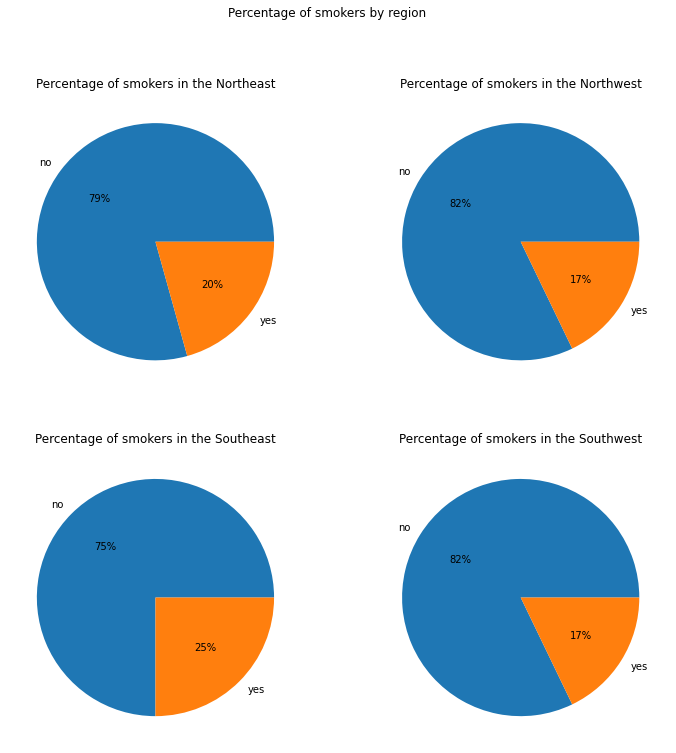

In [31]:
region_smokers = df.groupby(["region", "smoker"]).charges.count().reset_index()\
                    .pivot(columns = "smoker", index = "region", values = "charges").reset_index().fillna(0)
print(region_smokers)

smoker_labels = ["no", "yes"]
plot_region_smokers = lambda plot_region_smokers: plt.pie(region_smokers.loc[region_smokers["region"] == plot_region_smokers,\
              smoker_labels].values.tolist()[0], labels = smoker_labels, autopct="%d%%")
fig_smokers_region = plt.figure(figsize=(12,12))
fig_smokers_region.suptitle("Percentage of smokers by region")
plt.subplot(2,2,1)
plot_region_smokers("northeast")
plt.title("Percentage of smokers in the Northeast")
plt.subplot(2,2,2)
plot_region_smokers("northwest")
plt.title("Percentage of smokers in the Northwest")
plt.subplot(2,2,3)
plot_region_smokers("southeast")
plt.title("Percentage of smokers in the Southeast")
plt.subplot(2,2,4)
plot_region_smokers("southwest")
plt.title("Percentage of smokers in the Southwest")
plt.show()

#### Determining statistical significance with a Chi-square Test of Independence

The percentage of smokers in the Southeast region seems far greater than the percentages for the three other regions. I will confirm the statistical significance of this difference by performing a **Chi-square Test**. I will first prepare a contingency table containing the numbers of smokers and non smokers in each region; then I will perform the test and print out the results.

In [32]:
contingency_smoker_regions = [
    region_smokers.loc[region_smokers["region"] == "southeast", smoker_labels].values.tolist()[0],
    region_smokers.loc[region_smokers["region"] == "southwest", smoker_labels].values.tolist()[0],
    region_smokers.loc[region_smokers["region"] == "northwest", smoker_labels].values.tolist()[0],
    region_smokers.loc[region_smokers["region"] == "northeast", smoker_labels].values.tolist()[0]
    ]

smoker_regions_pval = perform_chi2_test(contingency_smoker_regions)

There is a 6.17% probability that these groups belong to a population with the same distribution.
The difference is not statistically significant.


#### Results

Even though we have detected a difference in the percentages of smokers and non smokers in the four groups, according to the **Chi-Square Test** this difference cannot be deemed statistically significant.

## Conclusions

This analysis has revealed that, in this dataset, higher insurance costs are paid by beneficiaries who have been categorized as men. Higher insurance costs are also paid by beneficiaries located in the Southeast region of the country. Further analysis has revealed some possible causes for these statistically significant differences. In the dataset, male beneficiaries are more likely to be smokers, while beneficiaries from the Southeast region are more likely to have higher BMI values.